<a href="https://colab.research.google.com/github/JakeOh/202110_itw_lab_python/blob/main/py22_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

필요한 라이브러리 모듈(Python 파일) 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips 데이터 셋

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Box plot

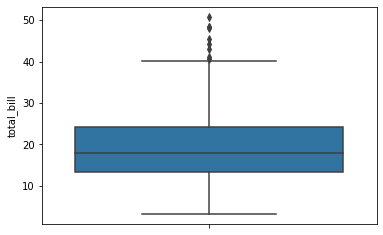

In [4]:
# total_bill box plot
sns.boxplot(y='total_bill', data=tips)
plt.show()

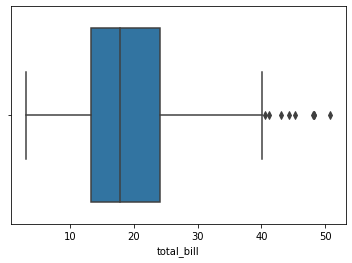

In [6]:
sns.boxplot(x='total_bill', data=tips)
plt.show()

성별 tip의 분포 시각화

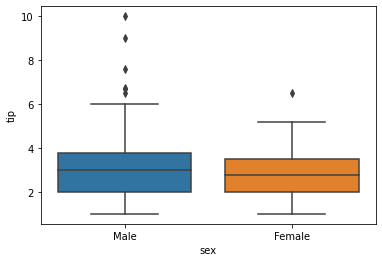

In [9]:
sns.boxplot(y='tip', data=tips, x='sex')
plt.show()

In [10]:
tip_male = tips[tips['sex'] == 'Male']
tip_male['tip'].describe()

count    157.000000
mean       3.089618
std        1.489102
min        1.000000
25%        2.000000
50%        3.000000
75%        3.760000
max       10.000000
Name: tip, dtype: float64

In [11]:
tip_female = tips[tips['sex'] == 'Female']
tip_female['tip'].describe()

count    87.000000
mean      2.833448
std       1.159495
min       1.000000
25%       2.000000
50%       2.750000
75%       3.500000
max       6.500000
Name: tip, dtype: float64

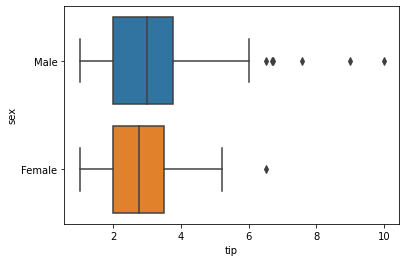

In [12]:
sns.boxplot(x='tip', y='sex', data=tips)
plt.show()

요일별 tip의 box plot

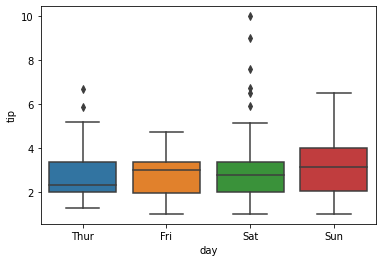

In [13]:
sns.boxplot(x='day', y= 'tip', data=tips)
plt.show()

* subplot 2개(1x2)를 생성
* 흡연여부별, 시간별 boxplot

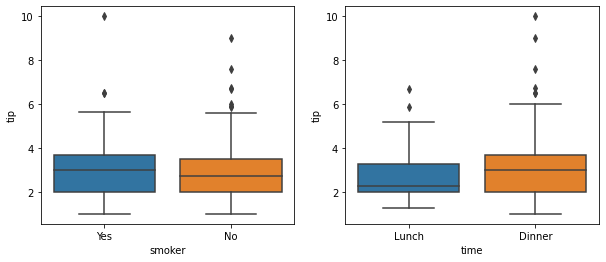

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

sns.boxplot(x='smoker', y='tip', data=tips, ax=ax[0])
sns.boxplot(x='time', y='tip', data=tips, ax=ax[1])

plt.show()

# Histogram

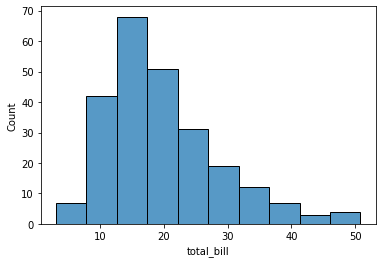

In [21]:
# total_bill histogram
sns.histplot(data=tips, x='total_bill', bins=10)
plt.show()

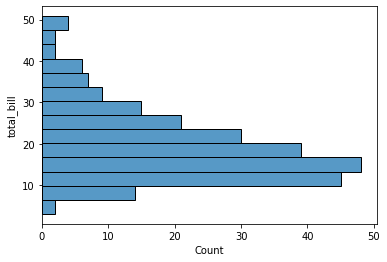

In [22]:
sns.histplot(data=tips, y='total_bill')
plt.show()

# Bar plot

## `countplot()`

카테고리 타입 변수의 빈도수(count)를 막대로 표현한 그래프

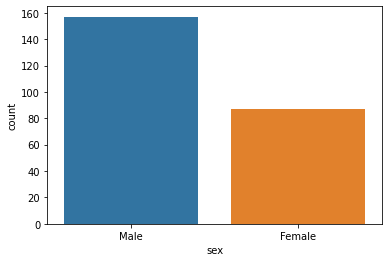

In [23]:
# 남성/여성 수 - 세로 막대 그래프
sns.countplot(data=tips, x='sex')
plt.show()

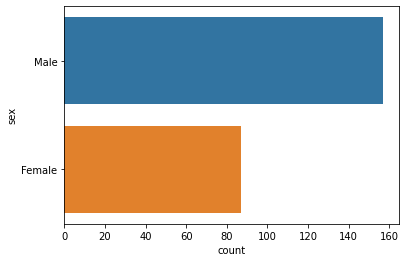

In [24]:
sns.countplot(data=tips, y='sex')
plt.show()

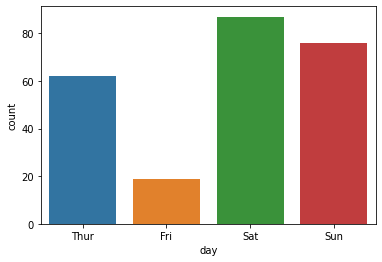

In [25]:
# 요일의 빈도수
sns.countplot(x='day', data=tips)
plt.show()

In [28]:
# 요일별 성별 빈도수
tips.groupby(by=['day', 'sex'])['tip'].count()

day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: tip, dtype: int64

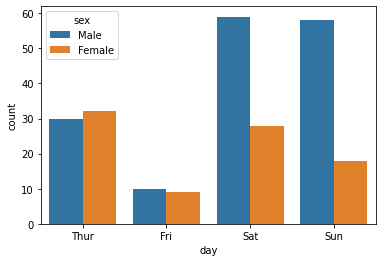

In [29]:
sns.countplot(x='day', hue='sex', data=tips)
#> hue=채우기 색깔. 막대를 채우는 색깔을 '성별'에 따라서 다르게 함.
plt.show()

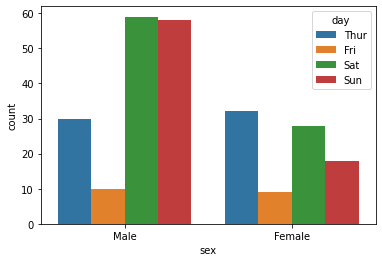

In [30]:
sns.countplot(x='sex', hue='day', data=tips)
plt.show()

In [31]:
# 성별, 흡연여부 빈도수
tips.groupby(by=['sex', 'smoker'])['tip'].count()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: tip, dtype: int64

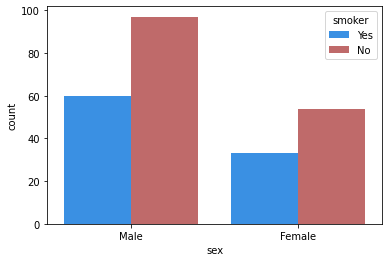

In [33]:
sns.countplot(x='sex', hue='smoker', data=tips,
              palette=['dodgerblue', 'indianred'])
plt.show()

## `barplot()`

* 그룹별 변수(컬럼)의 통계량(예: 평균, 중앙값, ...)을 막대로 시각화
* 카테고리 타입 변수와 연속형 변수를 함께 시각화

In [34]:
# 성별 tip의 평균
tips.groupby(by='sex')['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

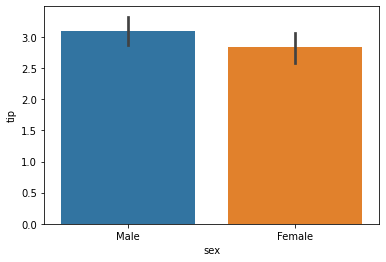

In [35]:
sns.barplot(x='sex', y='tip', data=tips)  # estimator=np.mean -> 막대의 높이는 평균값.
plt.show()

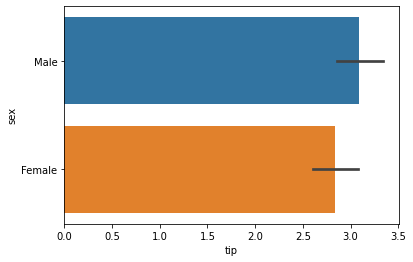

In [36]:
sns.barplot(x='tip', y='sex', data=tips)
plt.show()

In [37]:
# 성별 tip의 최댓값
tips.groupby(by='sex')['tip'].max()

sex
Male      10.0
Female     6.5
Name: tip, dtype: float64

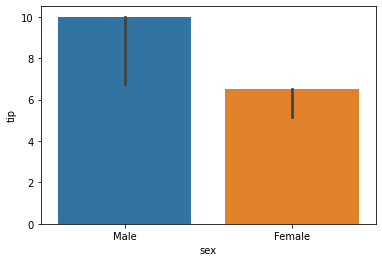

In [40]:
sns.barplot(x='sex', y='tip', data=tips, estimator=np.max)
plt.show()

In [41]:
# 요일별, 성별 tip의 평균
tips.groupby(by=['day', 'sex'])['tip'].mean()

day   sex   
Thur  Male      2.980333
      Female    2.575625
Fri   Male      2.693000
      Female    2.781111
Sat   Male      3.083898
      Female    2.801786
Sun   Male      3.220345
      Female    3.367222
Name: tip, dtype: float64

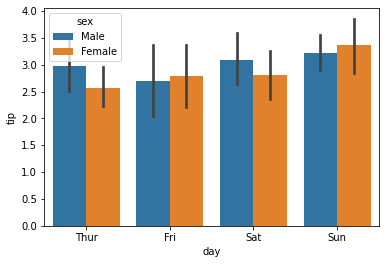

In [42]:
sns.barplot(x='day', y='tip', hue='sex', data=tips)
plt.show()

In [43]:
tips.groupby(by=['sex', 'day'])['tip'].mean()

sex     day 
Male    Thur    2.980333
        Fri     2.693000
        Sat     3.083898
        Sun     3.220345
Female  Thur    2.575625
        Fri     2.781111
        Sat     2.801786
        Sun     3.367222
Name: tip, dtype: float64

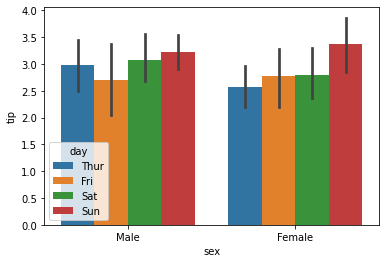

In [44]:
sns.barplot(x='sex', y='tip', hue='day', data=tips)
plt.show()

# Scatter plot

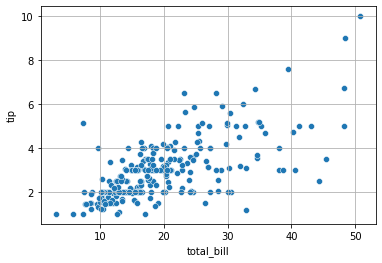

In [51]:
# tip ~ total_bill
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.grid()
plt.show()

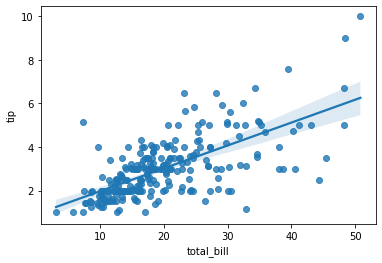

In [52]:
# regplot: regression plot(회귀 그래프). 산점도 + 선형 회귀 직선.
sns.regplot(x='total_bill', y='tip', data=tips)
plt.show()

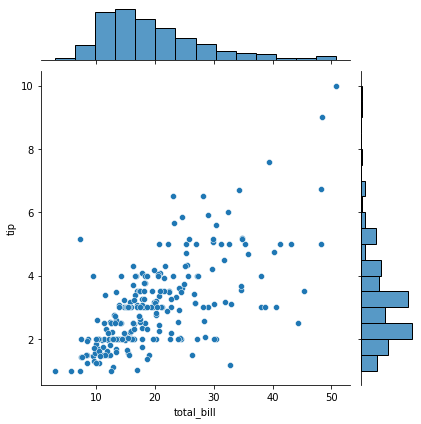

In [53]:
# jointplot: 산점도 + 히스토그램
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()

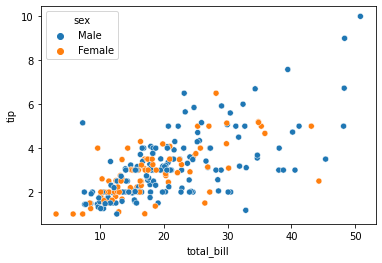

In [54]:
# tip ~ total_bill 산점도 + 점의 색깔을 성별(grouping)에 따라서 다르게 시각화
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips)
plt.show()

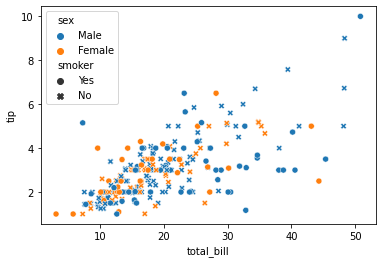

In [56]:
# tip ~ total_bill 산점도 + 색깔은 성별에 따라서 + 모양을 흡연여부에 따라서 다르게
sns.scatterplot(x='total_bill', y='tip', data=tips,
                hue='sex', style='smoker')
plt.show()

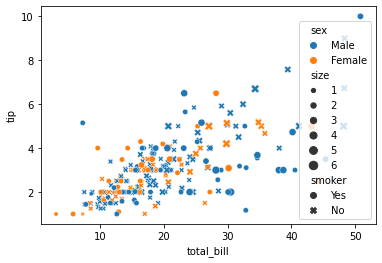

In [57]:
# tip ~ total_bill 산점도 + 색깔은 성별에 따라서 + 모양을 흡연여부 + 크기는 인원수에 따라서 다르게
sns.scatterplot(x='total_bill', y='tip', data=tips,
                hue='sex', style='smoker', size='size')
plt.show()

# Line plot

In [58]:
np.random.seed(1)
df = pd.DataFrame(data={'x': np.arange(10),
                        'y': np.random.rand(10)})
df

,x,y
0,0,0.417022
1,1,0.720324
2,2,0.000114
3,3,0.302333
4,4,0.146756
5,5,0.092339
6,6,0.186260
7,7,0.345561
8,8,0.396767
9,9,0.538817


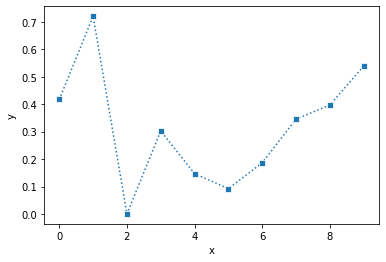

In [62]:
sns.lineplot(x='x', y='y', data=df, marker='s', linestyle=':')
plt.show()

# Category plot

카테고리별로 subplot을 생성하고 통계값(평균, 중앙값, ...)을 계산해서, 각각의 subplot에 같은 종류의 그래프들을 시각화.

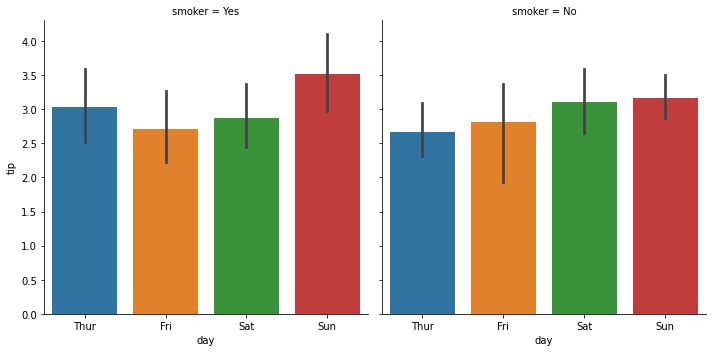

In [66]:
# 요일별 팁의 평균 막대 그래프 + 흡연 여부별 subplot
sns.catplot(x='day', y='tip', data=tips, kind='bar',
            col='smoker')
plt.show()

In [67]:
tips.groupby(by=['smoker', 'day'])['tip'].mean()

smoker  day 
Yes     Thur    3.030000
        Fri     2.714000
        Sat     2.875476
        Sun     3.516842
No      Thur    2.673778
        Fri     2.812500
        Sat     3.102889
        Sun     3.167895
Name: tip, dtype: float64

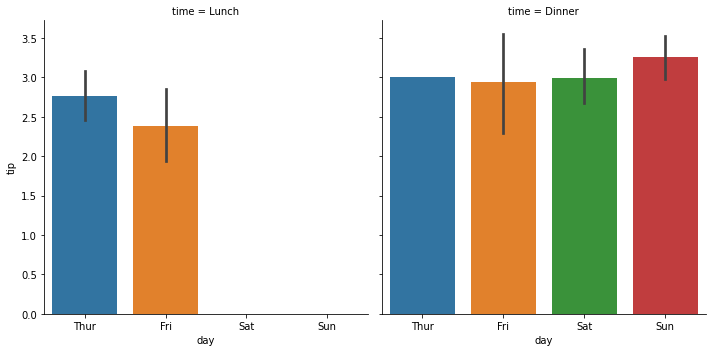

In [72]:
# 요일별 팁의 평균 막대 그래프 + 시간별 subplot
sns.catplot(x='day', y='tip', data=tips, kind='bar', col='time')
plt.show()

In [73]:
tips.groupby(by=['time', 'day'])['tip'].mean()

time    day 
Lunch   Thur    2.767705
        Fri     2.382857
        Sat          NaN
        Sun          NaN
Dinner  Thur    3.000000
        Fri     2.940000
        Sat     2.993103
        Sun     3.255132
Name: tip, dtype: float64

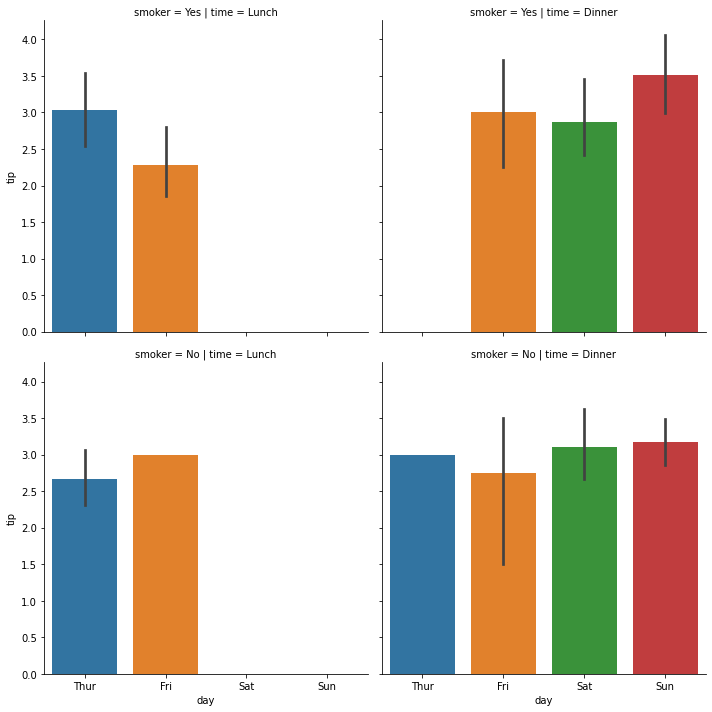

In [74]:
# 요일별 팁의 평균 막대 그래프 + 흡연여부별 subplot + 시간별 subplot
sns.catplot(x='day', y='tip', data=tips, kind='bar', row='smoker', col='time')
plt.show()

In [75]:
tips.groupby(by=['time', 'smoker', 'day'])['tip'].mean()

time    smoker  day 
Lunch   Yes     Thur    3.030000
                Fri     2.280000
                Sat          NaN
                Sun          NaN
        No      Thur    2.666364
                Fri     3.000000
                Sat          NaN
                Sun          NaN
Dinner  Yes     Thur         NaN
                Fri     3.003333
                Sat     2.875476
                Sun     3.516842
        No      Thur    3.000000
                Fri     2.750000
                Sat     3.102889
                Sun     3.167895
Name: tip, dtype: float64

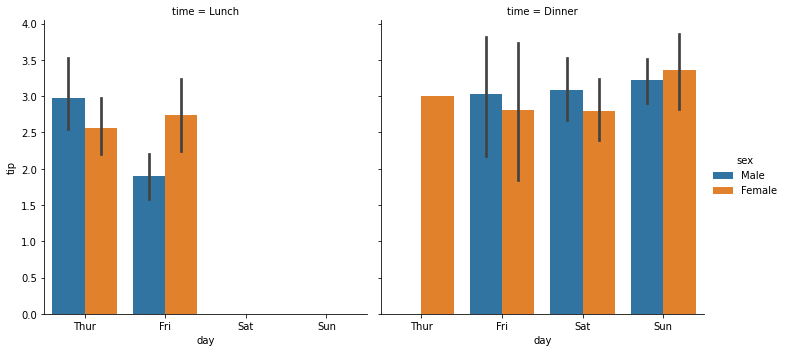

In [78]:
# 요일별 성별 팁의 평균 막대 그래프 + 시간별로 subplot
sns.catplot(x='day', y='tip', data=tips, kind='bar', hue='sex', col='time')
plt.show()

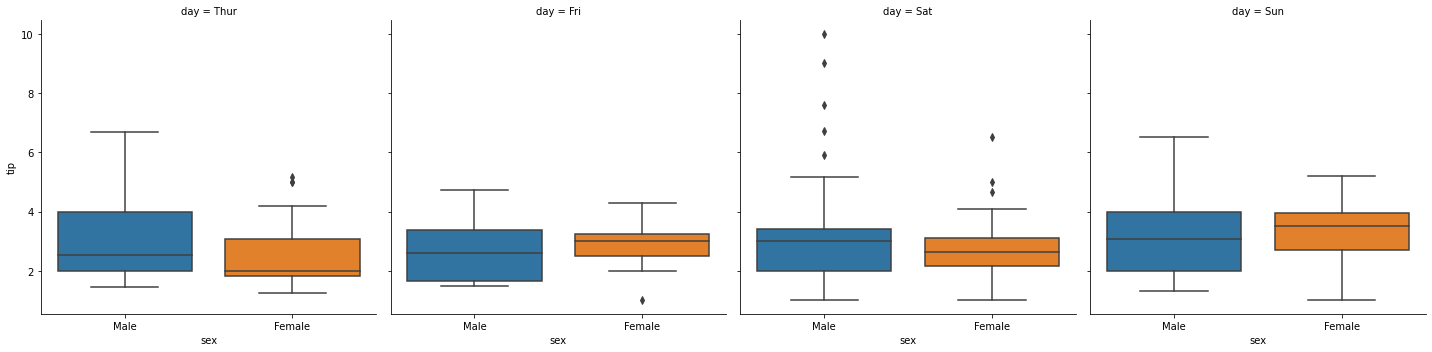

In [80]:
# 성별 팁의 box plot + 요일별 subplot
sns.catplot(x='sex', y='tip', data=tips, kind='box', col='day')
plt.show()

# iris 데이터 셋

* 품종을 제외한 4개 변수(컬럼)의 box plot
* 품종별로 subplot을 만들어서 4개 변수의 box plot
* petal_width ~ petal_length scatter plot. 품종별로 색깔을 다르게 시각화.
* Pair plot: 모든 연속형 변수들 간의 상관 관계 scatter plot.

In [81]:
iris = sns.load_dataset('iris')

In [82]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [83]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [84]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


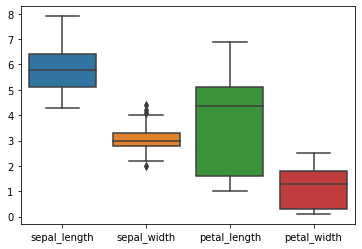

In [85]:
sns.boxplot(data=iris)
plt.show()

In [86]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

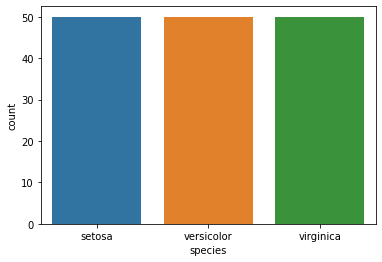

In [87]:
sns.countplot(x='species', data=iris)
plt.show()

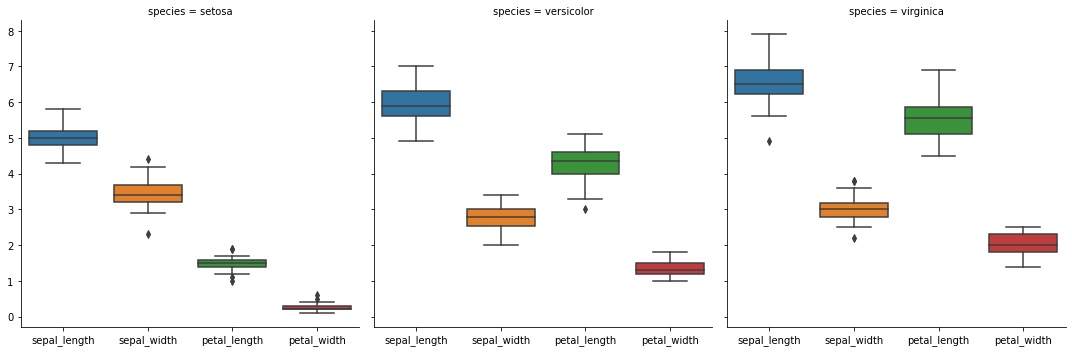

In [88]:
# 품종별 숫자 타입 변수들의 boxplot
sns.catplot(data=iris, kind='box', col='species')
plt.show()

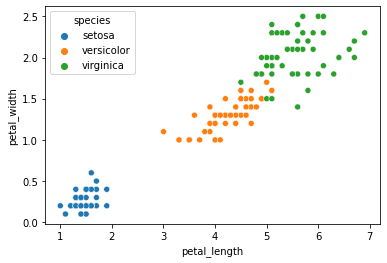

In [90]:
# petal_width ~ petal_length scatter plot. 품종별로 색깔을 다르게
sns.scatterplot(x='petal_length', y='petal_width', data=iris, hue='species')
plt.show()

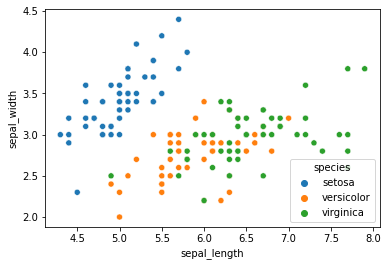

In [91]:
# sepal_width ~ sepal_length scatter plot. 품종별로 색깔을 다르게.
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris, hue='species')
plt.show()

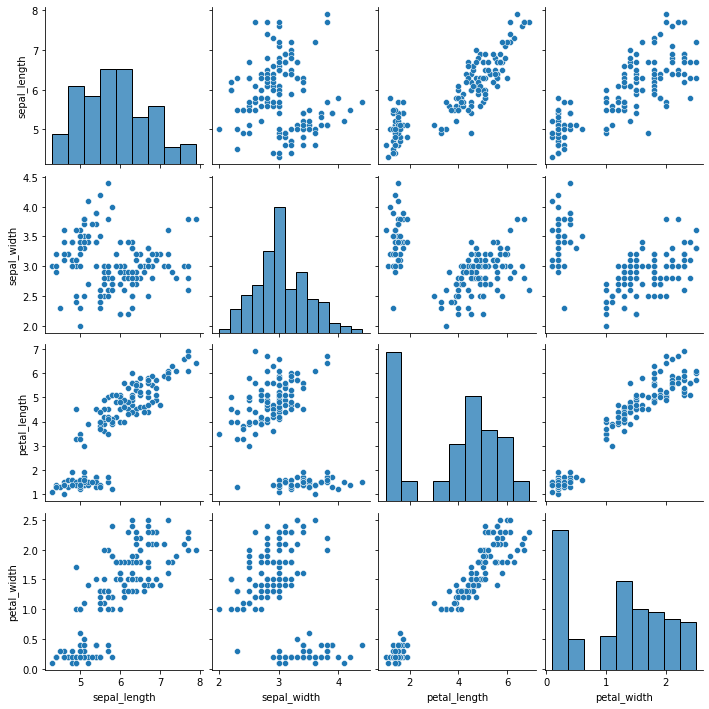

In [92]:
sns.pairplot(data=iris)
plt.show()

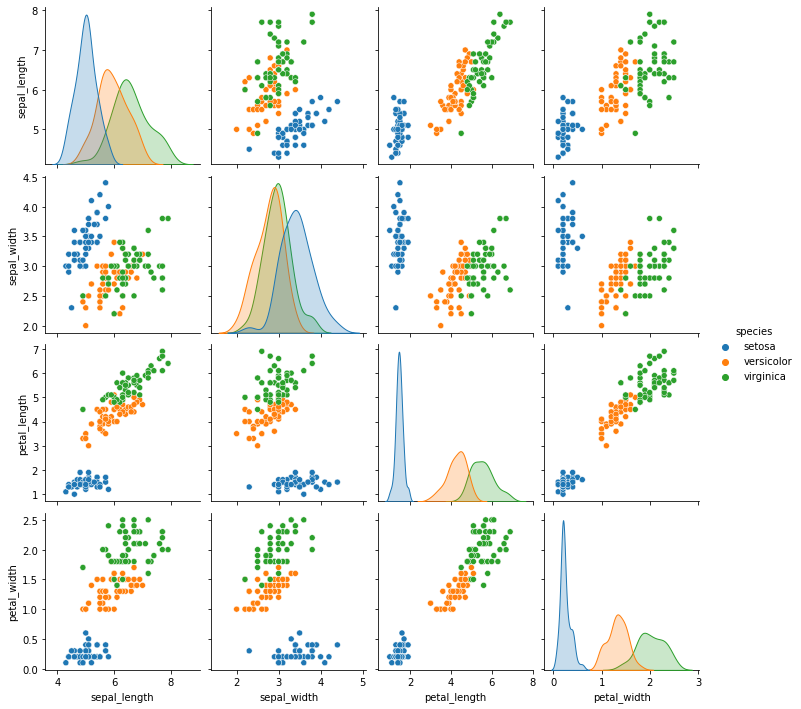

In [93]:
sns.pairplot(data=iris, hue='species')
plt.show()